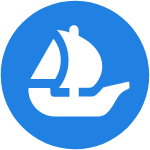

This notebook calls 30 days of transactions for NFT named collections on OpenSea - an NFT marketplace.

Note: Running the notebook requires an API key from OpenSea.

In [10]:
# imports
import pandas as pd
import datetime

import requests

import os
from dotenv import load_dotenv

In [14]:
# load API key
load_dotenv()
opensea_api_key = os.getenv("OPENSEA_API_KEY")

In [26]:
# input collection name (e.g., "nakamigos")
collection = input("Which NFT collection on OpenSea do you want to call?")

In [27]:
# set today's date
today = datetime.datetime.now()

# set number of days in past
past_date = today - datetime.timedelta(days=30)

# convert to unix (starting 1970!)
unix_past_date = int(past_date.timestamp())

# create blank df to store page data
events_df = pd.DataFrame()

# initialize next_event variable
next_event = None

# PAGINATION
while True:
    url = f"https://api.opensea.io/api/v2/events/collection/{collection}?after={unix_past_date}&event_type=sale"
    if next_event:
        # This adds the next event value (and required syntax) to the URL string
        url += f"&next={next_event}"

    headers = {
        "accept": "application/json",
        "x-api-key": opensea_api_key
    }

    response = requests.get(url, headers=headers)

    # formatting as json
    events_json = response.json()

    # get the "asset events"
    events_data = events_json.get("asset_events", [])
    
    # store to df
    page_events_df = pd.json_normalize(events_data)
    
    # concatenate to master df
    events_df = pd.concat([events_df, page_events_df], ignore_index=True)
    
    # update next_event for pagination
    next_event = events_json.get("next")

    # if there are no more pages, exit the loop
    if not next_event:
        break

# preview
events_df

,event_type,order_hash,chain,protocol_address,closing_date,quantity,seller,buyer,transaction,event_timestamp,...,nft.display_animation_url,nft.metadata_url,nft.opensea_url,nft.updated_at,nft.is_disabled,nft.is_nsfw,payment.quantity,payment.token_address,payment.decimals,payment.symbol
0,sale,,ethereum,,1725728771,1,0x8b49899d2e0285c6d7b9523037866f79e35da88c,0xe580a803a3b4b18bbb1aa8d6d7a55a640e8ec787,0x66432019a26a918878473b4167fc4524b120195af307...,1725728771,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-09-07T17:06:14.106290,False,False,123900000000000000,0x0000000000000000000000000000000000000000,18,ETH
1,sale,0x814b68d869d7323f63943eba8de47c6e6f5ca7acd331...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725728051,1,0x56019cb4a5eb7609ae072bbe082d915b17b4858e,0xe580a803a3b4b18bbb1aa8d6d7a55a640e8ec787,0x211b2aa8329f3d3c1d74d988f7bcbe0b6981fa071a07...,1725728051,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-09-07T16:54:13.848147,False,False,117900000000000000,0x0000000000000000000000000000000000000000,18,ETH
2,sale,,ethereum,,1725727955,1,0x81974c1a09e53c5129c6e4f74e547fda0adf4d2d,0x395870139791b36f88f5ec3a333c2a7380de8ce4,0xeea86815c13160764f5a76b619fe2b84317ea23c40f0...,1725727955,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-09-07T16:52:38.005675,False,False,188000000000000000,0x0000000000000000000000000000000000000000,18,ETH
3,sale,0x472d76aecf555ba467d7395b23cd0a08ef491f6979f2...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725726299,1,0xe46a5dfd891bc7a83115f8ed5c1dee7bd86459d8,0xe3d3d0ed702504e19825f44bc6542ff2ec45cb9a,0x6c3c99365a2637686d8a84b0b9475ed42f50836055aa...,1725726299,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-09-07T16:54:13.848147,False,False,129499000000000000,0x0000000000000000000000000000000000000000,18,ETH
4,sale,,ethereum,,1725720899,1,0x8ae85aa760f0fe45a95a9eb0c7cf87852baed714,0xdbc582775c31d191a9fea0f02b3c2c4e594ad748,0x0fd8a3b67c2c298e3ddb25300e4de4114b8d4ffa48c2...,1725720899,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-09-07T14:55:02.655856,False,False,140000000000000000,0x0000000000000000000000000000000000000000,18,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,sale,,ethereum,,1723195211,1,0x1e64c293de2ecd58a4ea48a511cd1bed386ac15a,0xb2d0b117d36cd9a74bafdb3d01ff754b30a66e23,0xd83941e6927489b7ec6017e761f4012212a5ca968fc7...,1723195211,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-08-10T09:42:13.827171,False,False,69000000000000000,0x0000000000000000000000000000000000000000,18,ETH
1151,sale,0x9cf31e15d497f1a2393af5526db57fc9584d47a0e4bd...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1723174463,1,0x9570fbd500d3591a19c8e3b07e5656249fbde200,0x1e9e390ee041142e280e992ad4fa9efb22a38dac,0x0dcf81b067db33df244404488b5dd4661a489a82af50...,1723174463,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-08-09T03:34:26.497154,False,False,206900000000000000,0x0000000000000000000000000000000000000000,18,ETH
1152,sale,0x062c21e25df1776375b13be9c4355df3cea57f7f49cd...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1723155455,1,0xaa14abb75d5d7a14d3ab5ac64205e5295b0410f6,0xb47c3fd4f8a83189c1230fbe1f51070cb5dbb8f3,0xae6243fd788aa705155babdfa33e85ef4a7a09bde74a...,1723155455,...,None,https://ipfs.io/ipfs/QmaN1jRPtmzeqhp6s3mR1SRK4...,https://opensea.io/assets/ethereum/0xd774557b6...,2024-08-08T22:17:40.310310,False,False,169000000000000000,0x0000000000000000000000000000000000000000,18,ETH
1153,sale,0x3a611458b1b428dd535c25f67783c46e026fded2d621...,ethereum,0x0000000000000068f116a89

In [36]:
# create CSV name
csv_name = f"{collection}_events.csv"

# write df to csv
events_df.to_csv(csv_name)